# Google Stock Price Prediction using RNN LTSM

This dataset has been downloaded from Google Stock. The prices are based on 2017 to 2021. The goal of this project is to predict the prices of January 2022. The prediction will be done by using the Recurrent Neural Network.

# Part 1 - Data Preprocessing

## Importing Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Training dataset

In [2]:
dataset_train = pd.read_csv('Google 2017 to 2021 - Train Data.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2017,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
1,1/4/2017,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2,1/5/2017,786.080017,794.479980,785.020020,794.020020,794.020020,1335200
3,1/6/2017,795.260010,807.900024,792.203979,806.150024,806.150024,1640200
4,1/9/2017,806.400024,809.966003,802.830017,806.650024,806.650024,1274600


We will need only the first two columns.

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

## Features Scaling

Features Scaling can be done by: 
* Standardization = (x-mean(x)) / standard deviation(x)
*   Normalization = (x-min(x)) / (max(x)-min(x))

It is recommended for this case to use normalization because our RNN model will be using the "sigmoid" function in the output RNN layer.
Thus, we will use MinMaxScaler class. The feature range (0, 1) means that all the new scale stock prices will be between 0 & 1 in addition to the fact that the normalization is based on the max minus min where max is larger than min.


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timesteps and 1 output

60 time steps means that at each time T, the RNN is going to look at the 60 stock prices before time T, that is the stock prices between 60 days before time T and time T.

Based on the trends it is capturing during these 60 previous timesteps, it will try to predict the next output.

So 60 timesteps of the past information from which our RNN is gonna try to learn and understand some correlations, or some trends, and based on its understanding, it's going to try to predict the next output.

Trying timestep:
* 1 timestep will cause overfitting. 
* 20 timesteps wasn't enough to capture all of the trends.
* 30 & 40 were good but I ended up with 60 which led to the best results.
60 timesteps correspond to three months. So that means that each day we're gonna look at the three previous month to try to predict the stock price the next day.

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building and Training the RNN

## Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout # This is essential to add some dropout regularization

## Initialising the RNN

We will initialize our RNN model as a sequence of layers.
The object is called regressor because in this model we are predicting a continuous output.

In [8]:
regressor = Sequential()

## Adding the first LSTM layer and some Dropout regularization

Dropout layer is important to help in avoiding overfitting.
The parameters are as following:
* units = is the number of LTSM cells we want to have in this layer. This must be a big relevant number because we want to have a high dimensionality in each of the multiple LSTM layers.
* return_sequence = this is set to True because we are building a stacked LSTM which therefore will have several LTSM layers. 
We will be adding later on more layers after this layer.
Therefore will have several LSTM layers and when we add another LSTM layer.
After the one we are creating right now, we have to set the return sequences argument to true.
Once we are done with our LSTM layers, we are not gonna add another one after that, so we will set it equal to false,
* input_shape = this is the shape of the input containing that we created in the last step of the preprocessing part which is in the shape of 3D array.


Dropout refers to the number of neurons we want to drop to regularize our model. The typical and most recommended rate is to use 0.2 which means 20% of our neurons in this layer will be ignored in the training.


In [9]:
regressor.add(LSTM(units = 256, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

## Adding a second LSTM layer and some Dropout regularization

## Adding a third LSTM layer and some Dropout regularization

---



In [10]:
regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.1))

In [11]:
regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.1))

In [12]:
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.1))

## Adding the output layer

The units is = 1 because the output we want is one which is the predicted price.

In [13]:
regressor.add(Dense(units = 1))

## Compiling the RNN

The Adam optimizer is always a safe choice. It's always a good choice because it is very powerful and it always performs some relevant updates of the weights.
The loss is "mean_sqiared_error" because this is a regression problem.

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the RNN to the Training set

* epochs = is the number of training times that we want to take place. The loss rate should not be very low or too high in order to reach into the highest accuracy possible and this is based on the epochs number.
* batch_size = means that our network will be built on batches of observations that is batches of stock prices going into the neural network.

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 41s 613ms/step - loss: 0.0151
Epoch 2/100
38/38 [==============================] - 16s 416ms/step - loss: 0.0017
Epoch 3/100
38/38 [==============================] - 16s 414ms/step - loss: 0.0015
Epoch 4/100
38/38 [==============================] - 16s 414ms/step - loss: 0.0015
Epoch 5/100
38/38 [==============================] - 16s 416ms/step - loss: 0.0016
Epoch 6/100
38/38 [==============================] - 16s 417ms/step - loss: 0.0014
Epoch 7/100
38/38 [==============================] - 17s 439ms/step - loss: 0.0015
Epoch 8/100
38/38 [==============================] - 16s 419ms/step - loss: 0.0018
Epoch 9/100
38/38 [==============================] - 17s 449ms/step - loss: 0.0013
Epoch 10/100
38/38 [==============================] - 16s 419ms/step - loss: 0.0012
Epoch 11/100
38/38 [==============================] - 16s 416ms/step - loss: 0.0013
Epoch 12/100
38/38 [==============================] - 16s 413ms/step - loss: 0.0014
E

# Part 3 - Making the predictions and visualising the results

## Getting the real stock price of Jan 2022


In [16]:
dataset_test = pd.read_csv('Google Jan 2022 - Test Data.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

## Getting the predicted stock price of Jan 2022

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 79):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualising the results

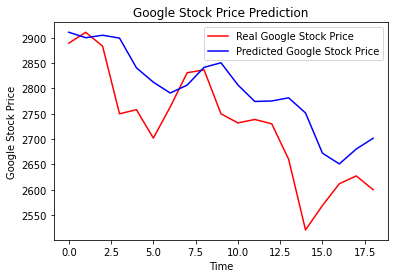

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Computing RMSE for our Stock Price Prediction Problem

In [19]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [20]:
rmse

90.74202268040484